In [2]:
### Auto reloading moduls
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from helpFunctions import *
from generateGLV import *
from fitGLV import *
from mpl_toolkits.mplot3d import Axes3D
import time

This script will run a long loop. -> Hence we want to ignore all warnigns!

In [3]:
import warnings 
warnings.filterwarnings('ignore')

# ExploreFit
In this notebook we will explore the different conditions on how good one can fit. For this we generate many timeseries for one condition and then compute the summarising value for those. Based on those many result we then make plots from which we draw our conclusion. 

Since it is pretty impossible to store everything in RAM, since this will be huge -> We will compute setting per setting and only save the most important from the generated timeseries. 

What we will do is just store the X,Y of each setting generated. -> Such that latter, if needed, one can again start from computing those.
Ok after calculating. For a simple grid -> Computing all data and storing all X, Y values would cost intotal 13 GB of space... We have that but it is not worth it + that would also take an insane amount of time. So we skip the saving of the data. What we do can do however is store the real matrix, the fitted matrix and the variance. 

We do accumalate our results from the different settings and also store those. Such that it does not need to be computed afterwards. (but this could be done really quick (normally)).

In [3]:
# First define the setting grid over which we want to loop.
noiseStrength = np.array([0.00001,0.0001,0.001,0.01,0.05,0.1,1])
noiseLen = len(noiseStrength)
interStength = np.array([0.,0.01,0.05,0.1,0.5,1,1.5])
interLen = len(interStength)
pertu = np.array([1000,50,20,10,5,1])
pertuLen = len(pertu)
shape = (pertuLen,noiseLen,interLen)
# 7*7*6 = 294

In [5]:
# Default
noiseSetting = {
    "noiseType" : "LangevinLinear",
    "noiseStrength" : 0.02
}
pertuSetting = {
    "period" : 1000,
    "strenght" : 0.05
}
genSetting = {
    "interactionStrenght" : 1}

------
Big for loop that will loop over everything


In [4]:
numberSpecies = 5
numberExperiments = 50

Now for each setting we want to summarise to summarise the setting. We have 12 summarising values. That we want to store. For that we each need to compute mean and std. And also store that. 

In [5]:
(MEANpercentG,MEANpercentS,MEANpercentI,MEANpercentWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDpercentG,STDpercentS,STDpercentI,STDpercentWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(MEANmedianG,MEANmedianS,MEANmedianI,MEANmedianWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDmedianG,STDmedianS,STDmedianI,STDmedianWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(MEANavgG,MEANavgS,MEANavgI,MEANavgWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDavgG,STDavgS,STDavgI,STDavgWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))

Important settings of series 1

- Settings are: 
    - Noise = np.array([0.00001,0.0001,0.001,0.01,0.05,0.1,1])
    - InteractionStrength np.array([0.,0.01,0.05,0.1,0.5,1,1.5])
    - Pertu = np.array([1000,50,20,10,5,1])
    - Order (i,j,k) = (pertu,Noise,Inter)
- NoiseType = "LangevinLinear
- PertuStrenght = 0.05
- Pertubation type Random
- Timestep = 0.01
- TMax = 100
- Intergration Type = euler
- SteadyState = all 1
- numberspecies = 5
- number of Exp = 50
- selfInteraction = uniform(-1.9,-0.1)

In [10]:
count = 0
date = time.time() # First empty
for i, p in enumerate(pertu):
    print(f"Started p={p}")
    pertuSetting["period"] = p
    for j, n in enumerate(noiseStrength):
        print(f"Started n={n}")
        noiseSetting["noiseStrength"] = n
        for k, s in enumerate(interStength):
            print(f"Started s={s}, count={count}/294, left = {294-count}, Time last loop = {np.round(time.time()-date,2)} seconds")
            date = time.time()
            genSetting["interactionStrenght"] = s
            count += 1
            
            TS =  TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting,pertuSetting)
            TS.generate()
            fitObj = fitGLV(TS)
            fitObj.computeNullHypo()
            
            # Store the important matrixes
            np.save(f"DataStorage/Series1/trueMat{i}{j}{k}.npy",fitObj.trueMat)
            np.save(f"DataStorage/Series1/BEst{i}{j}{k}.npy",fitObj.BEst)
            np.save(f"DataStorage/Series1/varBEst{i}{j}{k}.npy",fitObj.varBEst)
            
            # Store the wanted values in seperate matrixes
            saveAndStoreSummary((i,j,k),fitObj.nullSummary,"DataStorage/Series1/")

Started p=1000
Started n=1e-05
Started s=0.0, count=0/294, left = 294, Time last loop = 0.0 seconds
Started s=0.01, count=1/294, left = 293, Time last loop = 48.07 seconds
Started s=0.05, count=2/294, left = 292, Time last loop = 45.62 seconds
Started s=0.1, count=3/294, left = 291, Time last loop = 46.99 seconds
Started s=0.5, count=4/294, left = 290, Time last loop = 45.13 seconds
Started s=1.0, count=5/294, left = 289, Time last loop = 45.51 seconds
Started s=1.5, count=6/294, left = 288, Time last loop = 40.63 seconds
Started n=0.0001
Started s=0.0, count=7/294, left = 287, Time last loop = 40.9 seconds
Started s=0.01, count=8/294, left = 286, Time last loop = 42.15 seconds
Started s=0.05, count=9/294, left = 285, Time last loop = 43.39 seconds
Started s=0.1, count=10/294, left = 284, Time last loop = 43.81 seconds
Started s=0.5, count=11/294, left = 283, Time last loop = 42.02 seconds
Started s=1.0, count=12/294, left = 282, Time last loop = 51.96 seconds
Started s=1.5, count=13/2

In [8]:
def saveAndStoreSummary(c,S,p):
    # c = coordinates, S = summary, p=path
    # First update all the data matrixes
    percentArray = np.array([S["percentG"],S["percentS"],S["percentI"],S["percentWAvg"]])
    (MEANpercentG[c],MEANpercentS[c],MEANpercentI[c],MEANpercentWAvg[c]) = np.mean(percentArray,axis=1)
    (STDpercentG[c],STDpercentS[c],STDpercentI[c],STDpercentWAvg[c]) = np.std(percentArray,axis=1)
    
    medianArray = np.array([S["medianG"],S["medianS"],S["medianI"],S["medianWAvg"]])
    (MEANmedianG[c],MEANmedianS[c],MEANmedianI[c],MEANmedianWAvg[c]) = np.mean(medianArray,axis=1)
    (STDmedianG[c],STDmedianS[c],STDmedianI[c],STDmedianWAvg[c]) = np.std(medianArray,axis=1)
    
    avgArray = np.array([S["avgG"],S["avgS"],S["avgI"],S["avgWAvg"]])
    (MEANavgG[c],MEANavgS[c],MEANavgI[c],MEANavgWAvg[c]) = np.mean(avgArray,axis=1)
    (STDavgG[c],STDavgS[c],STDavgI[c],STDavgWAvg[c]) = np.std(avgArray,axis=1)
    
    # Now for safty if something would go wrong during generation we save at each stept the matrices!
    np.save(p+"MEANpercentG.npy",MEANpercentG)
    np.save(p+"MEANpercentS.npy",MEANpercentS)
    np.save(p+"MEANpercentI.npy",MEANpercentI)
    np.save(p+"MEANpercentWavg.npy",MEANpercentWAvg)
    np.save(p+"STDpercentG.npy",STDpercentG)
    np.save(p+"STDpercentS.npy",STDpercentS)
    np.save(p+"STDpercentI.npy",STDpercentI)
    np.save(p+"STDpercentWAvg.npy",STDpercentWAvg)
    
    np.save(p+"MEANmedianG.npy",MEANmedianG)
    np.save(p+"MEANmedianS.npy",MEANmedianS)
    np.save(p+"MEANmedianI.npy",MEANmedianI)
    np.save(p+"MEANmedianWAvg.npy",MEANmedianWAvg)
    np.save(p+"STDmedianG.npy",STDmedianG)
    np.save(p+"STDmedianS.npy",STDmedianS)
    np.save(p+"STDmedianI.npy",STDmedianI)
    np.save(p+"STDmedianWAvg.npy",STDmedianWAvg)
    
    np.save(p+"MEANavgG.npy",MEANavgG)
    np.save(p+"MEANavgS.npy",MEANavgS)
    np.save(p+"MEANavgI.npy",MEANavgI)
    np.save(p+"MEANavgWAvg.npy",MEANavgWAvg)
    np.save(p+"STDavgG.npy",STDavgG)
    np.save(p+"STDavgS.npy",STDavgS)
    np.save(p+"STDavgI.npy",STDavgI)
    np.save(p+"STDavgWAvg.npy",STDavgWAvg)

-------
# Evaluate results

In [15]:
def plotResults(mode="Matrix",variable = "percent",section="I"):
    MeanData = np.load("DataStorage/Series1/MEAN"+variable+section+".npy")
    StdData = np.load("DataStorage/Series1/STD"+variable+section+".npy")
    
    if mode=="Matrix":
        fig, axs = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(15,10))
        fig.suptitle(f"{variable}{section}", fontsize=22)
        
        # Plot the data
        for i, ax in enumerate(np.array(axs).flatten()):
            if variable=="percent":
                im = ax.matshow(MeanData[i],cmap="jet",vmin=0, vmax=1)
            else:
                im = ax.matshow(MeanData[i],cmap="jet",vmin=0, vmax=6)
            ax.set_title(f"period = {pertu[i]}",fontsize=15)
            
        # set tick labels correct
        rightSideAxes = (axs[0][0],axs[1][0])
        lowerSideAxes = (axs[1][0],axs[1][1],axs[1][2])
        for ax in rightSideAxes:
            ax.set_yticks(np.arange(7))
            ax.set_yticklabels(labels=noiseStrength)
            pass
        for ax in lowerSideAxes:
            ax.set_xticks(np.arange(7))
            ax.set_xticklabels(labels=interStength)
            ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=False)
        # Add x and Y label
        fig.text(0.5,0.07, "Interaction strenght", ha="center", va="center",fontsize=17)
        fig.text(0.1,0.5, "noise strenght", ha="center", va="center", rotation=90,fontsize=17)
        
        # Add color bar
        cax = fig.add_axes([0.9, 0.3, 0.03, 0.4])
        cbar = fig.colorbar(im, cax=cax)
        cbar.set_label(variable,fontsize=15)
        
        # adjust space between pltos
        plt.subplots_adjust( wspace=-0.2, hspace=None)
        

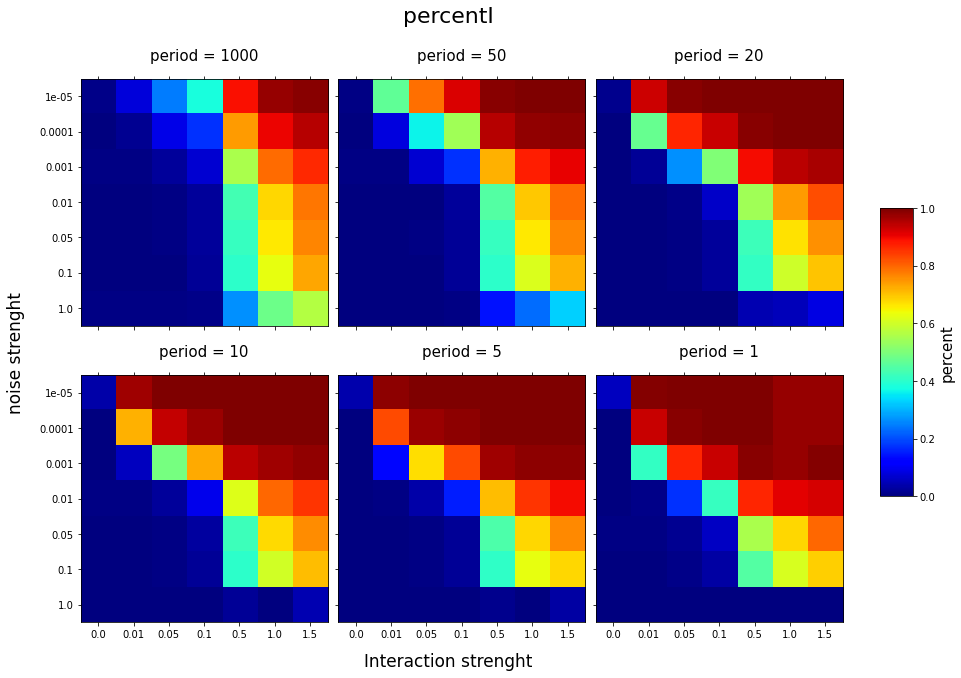

In [23]:
plotResults(variable="percent",section="I")

------
## Let's generate a few more but now with less times point. To closer simulate reality.

In [4]:
# First define the setting grid over which we want to loop.
noiseStrength = np.array([0.00001,0.0001,0.001,0.01,0.05,0.1,1])
noiseLen = len(noiseStrength)
interStength = np.array([0.,0.01,0.05,0.1,0.5,1,1.5])
interLen = len(interStength)
pertu = np.array([1000,50,20,10,5,1])
pertuLen = len(pertu)
shape = (pertuLen,noiseLen,interLen)
# 7*7*6 = 294

In [5]:
# Default
noiseSetting = {
    "noiseType" : "LangevinLinear",
    "noiseStrength" : 0.02
}
pertuSetting = {
    "period" : 1000,
    "strenght" : 0.05
}
genSetting = {
    "interactionStrenght" : 1}

In [6]:
numberSpecies = 5
numberExperiments = 50

In [7]:
(MEANpercentG,MEANpercentS,MEANpercentI,MEANpercentWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDpercentG,STDpercentS,STDpercentI,STDpercentWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(MEANmedianG,MEANmedianS,MEANmedianI,MEANmedianWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDmedianG,STDmedianS,STDmedianI,STDmedianWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(MEANavgG,MEANavgS,MEANavgI,MEANavgWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDavgG,STDavgS,STDavgI,STDavgWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))

In [9]:
count = 0
date = time.time() # First empty
for i, p in enumerate(pertu):
    print(f"Started p={p}")
    pertuSetting["period"] = p
    for j, n in enumerate(noiseStrength):
        print(f"Started n={n}")
        noiseSetting["noiseStrength"] = n
        for k, s in enumerate(interStength):
            print(f"Started s={s}, count={count}/294, left = {294-count}, Time last loop = {np.round(time.time()-date,2)} seconds")
            date = time.time()
            genSetting["interactionStrenght"] = s
            count += 1
            
            TS =  TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting,pertuSetting,timestep_=0.1)
            TS.generate()
            fitObj = fitGLV(TS)
            fitObj.computeNullHypo()
            
            # Store the important matrixes
            np.save(f"DataStorage/Series2/trueMat{i}{j}{k}.npy",fitObj.trueMat)
            np.save(f"DataStorage/Series2/BEst{i}{j}{k}.npy",fitObj.BEst)
            np.save(f"DataStorage/Series2/varBEst{i}{j}{k}.npy",fitObj.varBEst)
            
            # Store the wanted values in seperate matrixes
            saveAndStoreSummary((i,j,k),fitObj.nullSummary,"DataStorage/Series2/")

Started p=1000
Started n=1e-05
Started s=0.0, count=0/294, left = 294, Time last loop = 0.0 seconds
Started s=0.01, count=1/294, left = 293, Time last loop = 1.29 seconds
Started s=0.05, count=2/294, left = 292, Time last loop = 1.39 seconds
Started s=0.1, count=3/294, left = 291, Time last loop = 1.39 seconds
Started s=0.5, count=4/294, left = 290, Time last loop = 1.43 seconds
Started s=1.0, count=5/294, left = 289, Time last loop = 1.52 seconds
Started s=1.5, count=6/294, left = 288, Time last loop = 2.52 seconds
Started n=0.0001
Started s=0.0, count=7/294, left = 287, Time last loop = 2.5 seconds
Started s=0.01, count=8/294, left = 286, Time last loop = 2.5 seconds
Started s=0.05, count=9/294, left = 285, Time last loop = 2.49 seconds
Started s=0.1, count=10/294, left = 284, Time last loop = 2.47 seconds
Started s=0.5, count=11/294, left = 283, Time last loop = 2.37 seconds
Started s=1.0, count=12/294, left = 282, Time last loop = 2.55 seconds
Started s=1.5, count=13/294, left = 28

Reset

In [24]:
(MEANpercentG,MEANpercentS,MEANpercentI,MEANpercentWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDpercentG,STDpercentS,STDpercentI,STDpercentWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(MEANmedianG,MEANmedianS,MEANmedianI,MEANmedianWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDmedianG,STDmedianS,STDmedianI,STDmedianWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(MEANavgG,MEANavgS,MEANavgI,MEANavgWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDavgG,STDavgS,STDavgI,STDavgWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))

In [25]:
count = 0
date = time.time() # First empty
for i, p in enumerate(pertu):
    print(f"Started p={p}")
    pertuSetting["period"] = p
    for j, n in enumerate(noiseStrength):
        print(f"Started n={n}")
        noiseSetting["noiseStrength"] = n
        for k, s in enumerate(interStength):
            print(f"Started s={s}, count={count}/294, left = {294-count}, Time last loop = {np.round(time.time()-date,2)} seconds")
            date = time.time()
            genSetting["interactionStrenght"] = s
            count += 1
            
            TS =  TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting,pertuSetting,timestep_=0.5)
            TS.generate()
            fitObj = fitGLV(TS)
            fitObj.computeNullHypo()
            
            # Store the important matrixes
            np.save(f"DataStorage/Series3/trueMat{i}{j}{k}.npy",fitObj.trueMat)
            np.save(f"DataStorage/Series3/BEst{i}{j}{k}.npy",fitObj.BEst)
            np.save(f"DataStorage/Series3/varBEst{i}{j}{k}.npy",fitObj.varBEst)
            
            # Store the wanted values in seperate matrixes
            saveAndStoreSummary((i,j,k),fitObj.nullSummary,"DataStorage/Series3/")

Started p=1000
Started n=1e-05
Started s=0.0, count=0/294, left = 294, Time last loop = 0.0 seconds
Started s=0.01, count=1/294, left = 293, Time last loop = 0.27 seconds
Started s=0.05, count=2/294, left = 292, Time last loop = 0.27 seconds
Started s=0.1, count=3/294, left = 291, Time last loop = 0.29 seconds
Started s=0.5, count=4/294, left = 290, Time last loop = 0.31 seconds
Started s=1.0, count=5/294, left = 289, Time last loop = 0.34 seconds
Started s=1.5, count=6/294, left = 288, Time last loop = 0.45 seconds
Started n=0.0001
Started s=0.0, count=7/294, left = 287, Time last loop = 0.61 seconds
Started s=0.01, count=8/294, left = 286, Time last loop = 0.7 seconds
Started s=0.05, count=9/294, left = 285, Time last loop = 0.61 seconds
Started s=0.1, count=10/294, left = 284, Time last loop = 0.71 seconds
Started s=0.5, count=11/294, left = 283, Time last loop = 0.63 seconds
Started s=1.0, count=12/294, left = 282, Time last loop = 0.71 seconds
Started s=1.5, count=13/294, left = 2

In [12]:
(MEANpercentG,MEANpercentS,MEANpercentI,MEANpercentWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDpercentG,STDpercentS,STDpercentI,STDpercentWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(MEANmedianG,MEANmedianS,MEANmedianI,MEANmedianWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDmedianG,STDmedianS,STDmedianI,STDmedianWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(MEANavgG,MEANavgS,MEANavgI,MEANavgWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDavgG,STDavgS,STDavgI,STDavgWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))

In [13]:
count = 0
date = time.time() # First empty
for i, p in enumerate(pertu):
    print(f"Started p={p}")
    pertuSetting["period"] = p
    for j, n in enumerate(noiseStrength):
        print(f"Started n={n}")
        noiseSetting["noiseStrength"] = n
        for k, s in enumerate(interStength):
            print(f"Started s={s}, count={count}/294, left = {294-count}, Time last loop = {np.round(time.time()-date,2)} seconds")
            date = time.time()
            genSetting["interactionStrenght"] = s
            count += 1
            
            TS =  TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting,pertuSetting,timestep_=0.05)
            TS.generate()
            fitObj = fitGLV(TS)
            fitObj.computeNullHypo()
            
            # Store the important matrixes
            np.save(f"DataStorage/Series4/trueMat{i}{j}{k}.npy",fitObj.trueMat)
            np.save(f"DataStorage/Series4/BEst{i}{j}{k}.npy",fitObj.BEst)
            np.save(f"DataStorage/Series4/varBEst{i}{j}{k}.npy",fitObj.varBEst)
            
            # Store the wanted values in seperate matrixes
            saveAndStoreSummary((i,j,k),fitObj.nullSummary,"DataStorage/Series4/")

Started p=1000
Started n=1e-05
Started s=0.0, count=0/294, left = 294, Time last loop = 0.0 seconds
Started s=0.01, count=1/294, left = 293, Time last loop = 2.55 seconds
Started s=0.05, count=2/294, left = 292, Time last loop = 2.56 seconds
Started s=0.1, count=3/294, left = 291, Time last loop = 2.9 seconds
Started s=0.5, count=4/294, left = 290, Time last loop = 5.03 seconds
Started s=1.0, count=5/294, left = 289, Time last loop = 4.54 seconds
Started s=1.5, count=6/294, left = 288, Time last loop = 4.49 seconds
Started n=0.0001
Started s=0.0, count=7/294, left = 287, Time last loop = 4.5 seconds
Started s=0.01, count=8/294, left = 286, Time last loop = 4.43 seconds
Started s=0.05, count=9/294, left = 285, Time last loop = 4.27 seconds
Started s=0.1, count=10/294, left = 284, Time last loop = 4.57 seconds
Started s=0.5, count=11/294, left = 283, Time last loop = 4.57 seconds
Started s=1.0, count=12/294, left = 282, Time last loop = 4.35 seconds
Started s=1.5, count=13/294, left = 28

In [14]:
(MEANpercentG,MEANpercentS,MEANpercentI,MEANpercentWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDpercentG,STDpercentS,STDpercentI,STDpercentWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(MEANmedianG,MEANmedianS,MEANmedianI,MEANmedianWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDmedianG,STDmedianS,STDmedianI,STDmedianWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(MEANavgG,MEANavgS,MEANavgI,MEANavgWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))
(STDavgG,STDavgS,STDavgI,STDavgWAvg) = (np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf),np.full(shape,np.inf))

In [15]:
count = 0
date = time.time() # First empty
for i, p in enumerate(pertu):
    print(f"Started p={p}")
    pertuSetting["period"] = p
    for j, n in enumerate(noiseStrength):
        print(f"Started n={n}")
        noiseSetting["noiseStrength"] = n
        for k, s in enumerate(interStength):
            print(f"Started s={s}, count={count}/294, left = {294-count}, Time last loop = {np.round(time.time()-date,2)} seconds")
            date = time.time()
            genSetting["interactionStrenght"] = s
            count += 1
            
            TS =  TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting,pertuSetting,timestep_=0.02)
            TS.generate()
            fitObj = fitGLV(TS)
            fitObj.computeNullHypo()
            
            # Store the important matrixes
            np.save(f"DataStorage/Series5/trueMat{i}{j}{k}.npy",fitObj.trueMat)
            np.save(f"DataStorage/Series5/BEst{i}{j}{k}.npy",fitObj.BEst)
            np.save(f"DataStorage/Series5/varBEst{i}{j}{k}.npy",fitObj.varBEst)
            
            # Store the wanted values in seperate matrixes
            saveAndStoreSummary((i,j,k),fitObj.nullSummary,"DataStorage/Series5/")

Started p=1000
Started n=1e-05
Started s=0.0, count=0/294, left = 294, Time last loop = 0.0 seconds
Started s=0.01, count=1/294, left = 293, Time last loop = 13.07 seconds
Started s=0.05, count=2/294, left = 292, Time last loop = 13.32 seconds
Started s=0.1, count=3/294, left = 291, Time last loop = 13.55 seconds
Started s=0.5, count=4/294, left = 290, Time last loop = 13.32 seconds
Started s=1.0, count=5/294, left = 289, Time last loop = 13.33 seconds
Started s=1.5, count=6/294, left = 288, Time last loop = 13.3 seconds
Started n=0.0001
Started s=0.0, count=7/294, left = 287, Time last loop = 14.24 seconds
Started s=0.01, count=8/294, left = 286, Time last loop = 13.46 seconds
Started s=0.05, count=9/294, left = 285, Time last loop = 13.17 seconds
Started s=0.1, count=10/294, left = 284, Time last loop = 13.25 seconds
Started s=0.5, count=11/294, left = 283, Time last loop = 13.16 seconds
Started s=1.0, count=12/294, left = 282, Time last loop = 13.23 seconds
Started s=1.5, count=13/2

In [46]:
def plotTimeStep(variable = "percent",section="I"):
    MeanData = np.load("DataStorage/Series1/MEAN"+variable+section+".npy")
    StdData = np.load("DataStorage/Series1/STD"+variable+section+".npy")
    
    TimeStep = np.array([0.01,0.02,0.05,0.1,0.5])
    Series = np.array(["Series1","Series5","Series4","Series2","Series3"])
    
    fig, axs = plt.subplots(nrows=6, ncols=5, sharex=True, sharey=True, figsize=(15,16))
    fig.suptitle(f"{variable}{section} for different timesteps", fontsize=22)
        
    #loop over the axes
    for row, axs_row  in enumerate(axs):
        for column, ax in enumerate(axs_row):
            # create labels
            if row==0:# The top row
                ax.set_title(f"timestep = {TimeStep[column]}",fontsize=15,pad=20)
            if column==0: # The right side
                ax.set_ylabel(f"period = {pertu[row]}",fontsize=15)
            
            # Plot the data
            MeanData = np.load("DataStorage/"+Series[column]+"/MEAN"+variable+section+".npy")
            if variable=="percent":
                im = ax.matshow(MeanData[row],cmap="jet",vmin=0, vmax=1)
            else:
                im = ax.matshow(MeanData[row],cmap="jet",vmin=0, vmax=6)
    
    # Tick lables for some weird reason have to be done this way :/ 
    rightSideAxes = (axs[0][0],axs[1][0],axs[2][0],axs[3][0],axs[4][0],axs[5][0])
    lowerSideAxes = (axs[5][0],axs[5][1],axs[5][2],axs[5][3],axs[5][4])
    topSideAxes = (axs[0][0],axs[0][1],axs[0][2],axs[0][3],axs[0][4])
    for ax in rightSideAxes:
        ax.set_yticks(np.arange(7))
        ax.set_yticklabels(labels=noiseStrength)
        pass
    for ax in lowerSideAxes:
        ax.set_xticks(np.arange(7))
        ax.set_xticklabels(labels=interStength)
        ax.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=False)
    for ax in topSideAxes:
        ax.set_xticks(np.arange(7))
        ax.set_xticklabels(labels=interStength)
        ax.tick_params(axis="x", bottom=True, top=True, labelbottom=False, labeltop=True)
    # Add color bar
    #cax = fig.add_axes([0.9, 0.3, 0.03, 0.4])
    #cbar = fig.colorbar(im, cax=cax)
    #cbar.set_label(variable,fontsize=15)
    # Add x and Y label
    fig.text(0.5,0.1, "Interaction strenght", ha="center", va="center",fontsize=17)
    fig.text(0.1,0.5, "noise strenght", ha="center", va="center", rotation=90,fontsize=17)  
    # adjust space between pltos
    
    plt.subplots_adjust( wspace=-0.4, hspace=None)
        

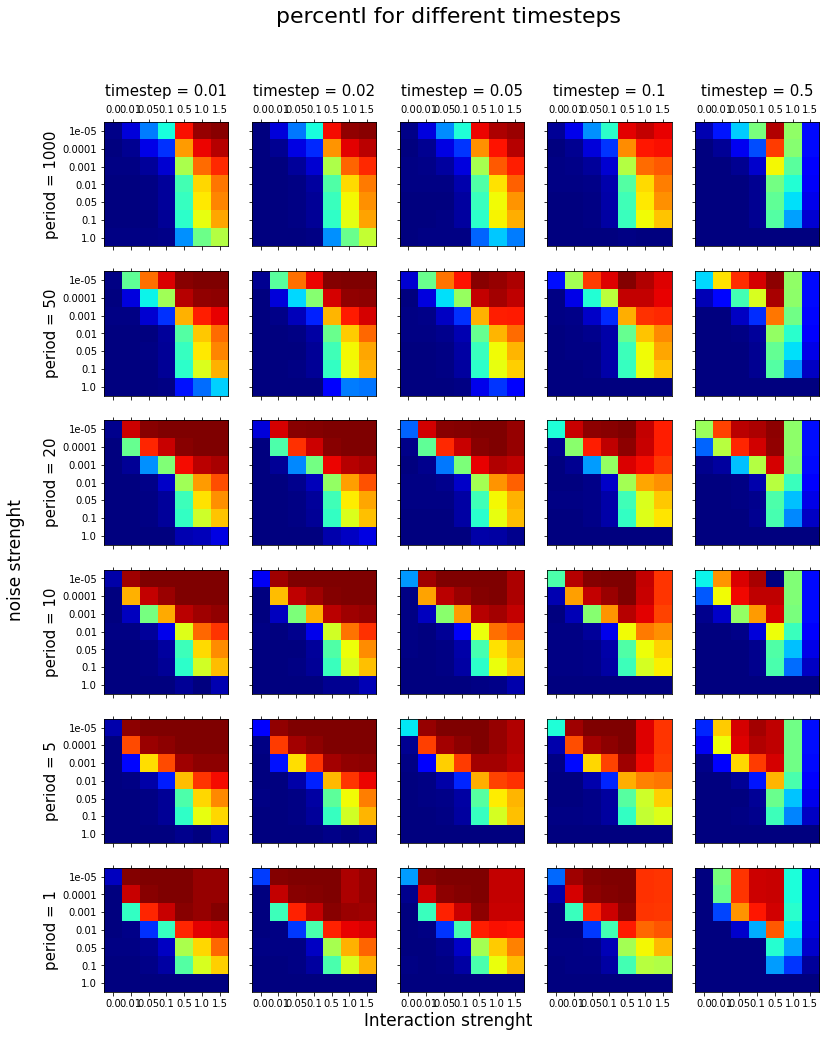

In [47]:
plotTimeStep()

Important was that series were as follows:

- TimeStep = np.array([0.01,0.02,0.05,0.1,0.5])
- Series = np.array(["Series1","Series5","Series4","Series2","Series3"])

-----
## Next point: Supsample

Look at one every other...

For this there will be a code modification in the fitGLV package.

With the computation of the GLV.

In [51]:
noiseSetting = {
    "noiseType" : "LangevinLinear",
    "noiseStrength" : 0.1
}
pertuSetting = {
    "period" : 50,
    "strenght" : 0.05
}
genSetting = {
    "interactionStrenght" : 1}

numberSpecies = 5
numberExperiments = 2

# Generate

TS = TS_GLV(numberSpecies,numberExperiments,noiseSetting,genSetting, pertuSetting)
TS.generate()

In [52]:
fitObjt = fitGLV(TS,stepSample=2)

(array([2499]),)
